In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [289]:
# Chargement des données
df = pd.read_csv('Breast_Cancer.csv')
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [291]:
#information des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [293]:
#Statistiques descriptives
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [295]:
# Vérification des valeurs manquantes
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [297]:
# Vérification des valeurs abérrantes
def aberrantes(df,colonne):
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sub = Q3 + 1.5 * IQR
    outliers=df[(df[colonne]< borne_inf) | (df[colonne]> borne_sub)]
    return outliers
variables=['Age', 'Tumor Size',	'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
for col in variables:
    outliers= aberrantes(df,col)
    print(f"{col} - Nombre de valeurs aberrantes : {len(outliers)}")

Age - Nombre de valeurs aberrantes : 0
Tumor Size - Nombre de valeurs aberrantes : 222
Regional Node Examined - Nombre de valeurs aberrantes : 72
Reginol Node Positive - Nombre de valeurs aberrantes : 344
Survival Months - Nombre de valeurs aberrantes : 18


In [299]:
#On remplace les valeurs abérrantes par les valeurs seuils
for col in variables:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1-1.5*IQR
    borne_sup = Q3+1.5*IQR
    df[col] = np.where(df[col]< borne_inf, borne_inf, 
              np.where(df[col]> borne_sup, borne_sup, df[col]))

In [301]:
#Verification des valeurs abérrantes 
def verif(df, colonne):
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    outliers=df[(df[colonne]< borne_inf) | (df[colonne]> borne_sup)].shape[0]
    print(f"valeurs restante pour la {colonne}: {outliers}")

verif(df, "Tumor Size")
verif(df, "Regional Node Examined")
verif(df, "Reginol Node Positive")
verif(df, "Survival Months")

valeurs restante pour la Tumor Size: 0
valeurs restante pour la Regional Node Examined: 0
valeurs restante pour la Reginol Node Positive: 0
valeurs restante pour la Survival Months: 0


In [303]:
# Vérification des valeurs uniques dans la cible
print("Valeurs uniques de Status :", df['Status'].unique())

Valeurs uniques de Status : ['Alive' 'Dead']


In [305]:
# Encodage de la cible (adaptez si nécessaire)
df['Status'] = df['Status'].map({'Alive': 0, 'Dead': 1})

In [307]:
# Séparation X/y
X = df.drop(['Status', 'Marital Status'], axis=1)
y = df['Status']

In [309]:
# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.astype(int)

In [311]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [313]:
# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [315]:
# Régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [317]:
# Prédictions
y_pred = model.predict(X_test)

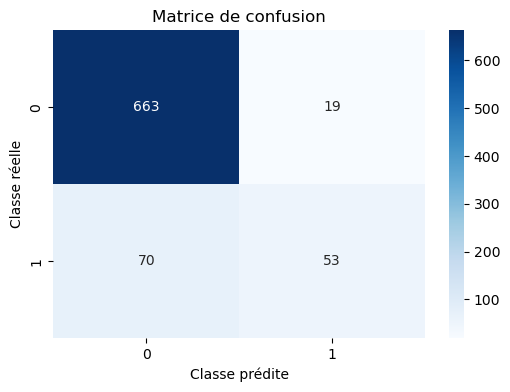

In [319]:
# Evaluation du modéle
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Classe prédite")
plt.ylabel('Classe réelle')
plt.show()

663 vrais négatifs : Le modèle a bien classé 663 patients vivants comme vivants.

19 faux positifs : 19 patients vivants ont été prévus à tort comme morts.

70 faux négatifs : 70 patients morts ont été prévus comme vivants, ce qui peut entrainer des problèmes car ce sont des cas critiques manqués.

53 vrais positifs : 53 décès correctement détectés.

In [322]:
print("\nClassification Report :")
print(classification_report(y_test, y_pred))


Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       682
           1       0.74      0.43      0.54       123

    accuracy                           0.89       805
   macro avg       0.82      0.70      0.74       805
weighted avg       0.88      0.89      0.88       805



Classe 0 (Alive = Vivant) :

Précision = 0.90 : parmi tous les patients prédits comme vivants, 90% le sont réellement.

Rappel (Recall) = 0.97: le modèle détecte 97% des patients vivants réels (peu de faux négatifs pour cette classe).

F1-score = 0.94: bon équilibre entre précision et rappel, donc très bonne performance pour détecter les vivants.

Classe 1 (dead = Décès) :

Précision = 0.74: parmi tous les patients prédits comme décès, 74% le sont réellement.

Rappel (Recall) = 0.43: le modèle détecte seulement 43% des décès réels (beaucoup de faux négatifs).

F1-score = 0.54: faible score indiquant que le modèle a du mal à bien identifier tous les décès.


Le modèle est très performant pour identifier les patients vivants (classe majoritaire) avec un très bon rappel et précision.

En revanche, il détecte moins bien les décès, avec un rappel relativement faible : il rate environ 57% des décès réels (faux négatifs = 70). Cela est préoccupant car ne pas détecter ces cas critiques peut avoir un impact fort en contexte médical.

# K-NN

In [327]:
# Determination du K optimal
k_values = list(range(1,31))
accuracies = []

for k in k_values :
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

In [329]:
for k, acc in zip(k_values, accuracies) :
    print(f'k = {k} -----> Accuracy = {acc : .2f}')

k = 1 -----> Accuracy =  0.84
k = 2 -----> Accuracy =  0.86
k = 3 -----> Accuracy =  0.86
k = 4 -----> Accuracy =  0.86
k = 5 -----> Accuracy =  0.86
k = 6 -----> Accuracy =  0.86
k = 7 -----> Accuracy =  0.86
k = 8 -----> Accuracy =  0.86
k = 9 -----> Accuracy =  0.86
k = 10 -----> Accuracy =  0.86
k = 11 -----> Accuracy =  0.86
k = 12 -----> Accuracy =  0.86
k = 13 -----> Accuracy =  0.86
k = 14 -----> Accuracy =  0.86
k = 15 -----> Accuracy =  0.86
k = 16 -----> Accuracy =  0.86
k = 17 -----> Accuracy =  0.86
k = 18 -----> Accuracy =  0.86
k = 19 -----> Accuracy =  0.86
k = 20 -----> Accuracy =  0.86
k = 21 -----> Accuracy =  0.86
k = 22 -----> Accuracy =  0.86
k = 23 -----> Accuracy =  0.86
k = 24 -----> Accuracy =  0.86
k = 25 -----> Accuracy =  0.86
k = 26 -----> Accuracy =  0.86
k = 27 -----> Accuracy =  0.86
k = 28 -----> Accuracy =  0.86
k = 29 -----> Accuracy =  0.86
k = 30 -----> Accuracy =  0.86


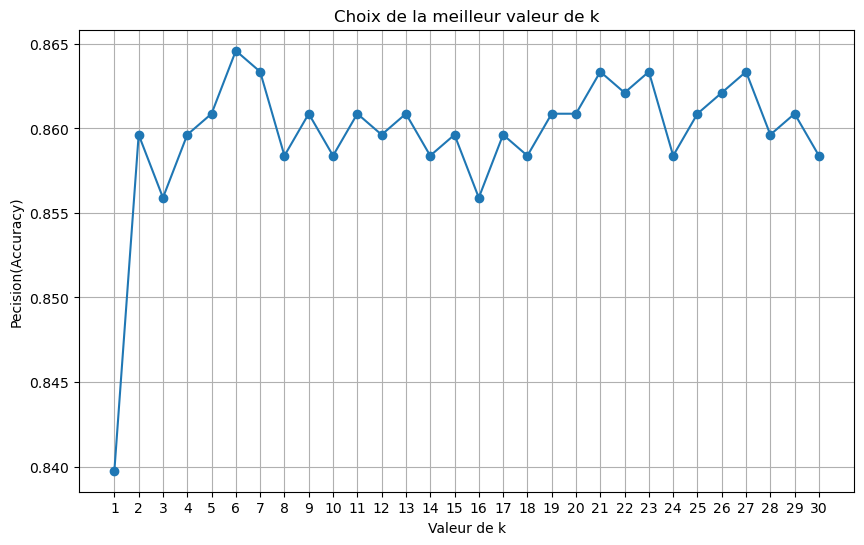

In [331]:
# Affichage du graphique
plt.figure(figsize = (10, 6))
plt.plot(k_values, accuracies, marker = 'o')
plt.xlabel('Valeur de k')
plt.ylabel('Pecision(Accuracy)')
plt.title('Choix de la meilleur valeur de k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [333]:
# Donc ici on prend k = 11

# Créer le modéle KNN 
knn_model = KNeighborsClassifier(n_neighbors=2)   
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [335]:
# Prédiction du modéle KNN
y_pred_knn = knn_model.predict(X_test)

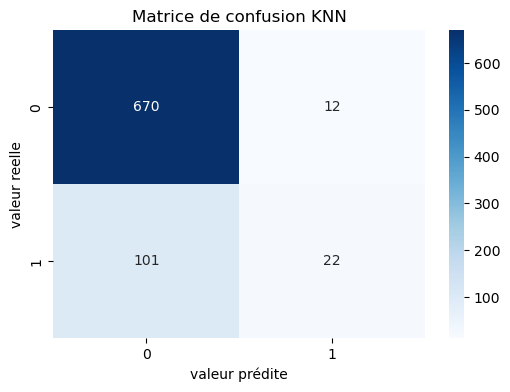

In [337]:
# Evaluation du modéle KNN
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion KNN")
plt.xlabel("valeur prédite")
plt.ylabel("valeur reelle")
plt.show()

670 vrais négatifs : 670 patients réellement vivants ont été correctement prévus comme vivants.

12 faux positifs : 12 patients vivants ont été prévus à tort comme morts.

101 faux négatifs : 101 patients morts ont été prévus comme vivants, c’est le point le plus préoccupant car ces décès n’ont pas été détectés.

22 vrais positifs : 22 décès ont été correctement prévus comme morts.

In [340]:
# Rapport de classification 
print("\n Rapport de classification : \n", classification_report(y_test, y_pred_knn))


 Rapport de classification : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       682
           1       0.65      0.18      0.28       123

    accuracy                           0.86       805
   macro avg       0.76      0.58      0.60       805
weighted avg       0.84      0.86      0.82       805



Classe 0 (Alive) :

Précision : 0.87: parmi les prédictions « vivant », 87% étaient effectivement des patients vivants.

Rappel : 0.98: le modèle a réussi à détecter 98% des vivants réels : il rate très peu de cas vivants (peu de faux négatifs pour cette classe).

Classe 1 (Dead) :

Précision : 0.65: parmi les prédictions « décès », 65% étaient effectivement des décès.

Rappel : 0.18: le modèle n’a détecté que 18% des décès réels (énormément de faux négatifs : 101 décès réels ont été prédis vivants).

F1-score : 0.28: la combinaison précision-rappel est faible : le modèle a des difficultés à détecter efficacement les décès.

Conclusion:


La régression logistique est meilleure pour détecter les décès (classe 1) :

Elle a un rappel décès plus élevé (0.43 vs 0.18), elle détecte mieux les vrais décès.

Elle a un meilleur F1-score décès (0.54 vs 0.28), donc un meilleur équilibre entre précision et rappel sur cette classe critique.

Les deux modèles sont très bons pour la classe vivante (classe 0) :

Le KNN a un rappel légèrement supérieur (0.98 vs 0.97), mais la différence est minime.

Sur un problème médical, détecter correctement les décès est souvent plus important que simplement bien prédire les vivants. Un faux négatif (prédire vivant alors que le patient décède) peut être grave. Donc on choisit la régression logistique comme notre modéle 